In [1]:
import pandas as pd
import seaborn as sns
from PIL import Image
from urllib.request import urlopen
import io
%matplotlib inline

In [ ]:
originalFile = 'pornhub.com-db.csv'

Shrink large dataset

In [ ]:
# originalDataset = pd.read_csv(originalFile, chunksize=100000, iterator=True, on_bad_lines='skip')
# for idx, chunk in enumerate(originalDataset):
    # chunk.to_csv(f'pornhub.com-db-shrinked{idx}-0.csv', mode='a', header=False, index=False) 

In [ ]:
columns = ['embed','thumbnail','thumbnail2','title','tags','categories','pornstars','duration','views','likes','dislikes','thumbnail3','thumbnail4']

In [ ]:
# dataset = pd.read_csv('pornhub.com-db-shrinked1-0.csv', delimiter='|', on_bad_lines='skip')
# dataset.to_csv('pornhub.com-db-shrinked1-0-fixed.csv', mode='a', header=False, index=False)

Data cleaning & processing

In [ ]:
# from collections import Counter
# count = Counter()
# for i in range(len(dataset)):
#     count[len(dataset.iloc[i].embed.split('|'))] += 1
# count

In [ ]:
# datasetValidation = [len(dataset.iloc[i].embed.split('|')) == 13 for i in range(len(dataset))]
# dataset = dataset[datasetValidation]

In [ ]:
# datasetFixed = pd.DataFrame([dataset.iloc[i].embed.split('|') for i in range(1, len(dataset))], columns=dataset.iloc[0].embed.split('|'))

In [ ]:
# datasetFixed.to_csv('pornhub.com-db-shrinked1-0-fixed.csv', index=False, header=True, sep='|')

Data quality check

In [7]:
# dataset = pd.read_csv('pornhub.com-db.csv', delimiter='|', on_bad_lines='skip', header=None)
# dataset.columns = columns
dataset = pd.read_csv('pornhub.com-db-shrinked1-0-fixed.csv', delimiter='|', on_bad_lines='skip')
len(dataset)

99485

In [3]:
dataset.value_counts();

In [ ]:
# dataset.columns = columns

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99485 entries, 0 to 99484
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   embed       99485 non-null  object 
 1   thumbnail   99485 non-null  object 
 2   thumbnail2  99485 non-null  object 
 3   title       99485 non-null  object 
 4   tags        99426 non-null  object 
 5   categories  99484 non-null  object 
 6   pornstars   33986 non-null  object 
 7   duration    99485 non-null  int64  
 8   views       99485 non-null  int64  
 9   likes       98529 non-null  float64
 10  dislikes    98529 non-null  float64
 11  thumbnail3  99485 non-null  object 
 12  thumbnail4  99485 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 9.9+ MB


In [8]:
def convertStringDelimiterToList(Row):
    try:
        Row['pornstars']=  Row['pornstars'].split(';')
        Row['tags']=  Row['tags'].split(';')
        Row['categories']=  Row['categories'].split(';')
        return Row
    except AttributeError:
        print(Row)
        raise AttributeError

In [9]:
dropNAN = dataset.dropna(subset=['pornstars', 'tags', 'categories'])

In [110]:
processedDataset = dropNAN.apply(convertStringDelimiterToList, axis=1)

In [6]:
dataset.head()

,embed,thumbnail,thumbnail2,title,tags,categories,pornstars,duration,views,likes,dislikes,thumbnail3,thumbnail4
0,"<iframe src=""https://www.pornhub.com/embed/110...",https://di.phncdn.com/videos/201312/29/2142343...,https://di.phncdn.com/videos/201312/29/2142343...,Sexy teen fucked by her masseur,teenmegaworld;teens;young;tricky-masseur;blond...,Pornstar;Teen (18+);Small Tits;Massage,Milana Fox,406,336754,526.0,211.0,https://di.phncdn.com/videos/201312/29/2142343...,https://di.phncdn.com/videos/201312/29/2142343...
1,"<iframe src=""https://www.pornhub.com/embed/641...",https://di.phncdn.com/videos/201312/30/2142671...,https://di.phncdn.com/videos/201312/30/2142671...,Fisting in her pussy and ass,filthyandfisting;european;girl-on-girl;lesbian...,Fisting;Lesbian;Euro,Bonny Bon,886,17474,48.0,15.0,https://di.phncdn.com/videos/201312/30/2142671...,https://di.phncdn.com/videos/201312/30/2142671...
2,"<iframe src=""https://www.pornhub.com/embed/639...",https://di.phncdn.com/videos/201312/30/2142698...,https://di.phncdn.com/videos/201312/30/2142698...,fuck blonde girl,theclassicporn;classic;retro;cum-shot;orgasm;v...,Big Tits;Blonde;Cumshot;Hardcore;MILF;Pornstar...,mike horner,654,28875,82.0,11.0,https://di.phncdn.com/videos/201312/30/2142698...,https://di.phncdn.com/videos/201312/30/2142698...
3,"<iframe src=""https://www.pornhub.com/embed/465...",https://di.phncdn.com/videos/201312/30/2142729...,https://di.phncdn.com/videos/201312/30/2142729...,classic hairi fuck,theclassicporn;classic;retro;cumshot;big-nippl...,Big Dick;Big Tits;Cumshot;Pornstar;Vintage,Nikki Knight;nikki knights;Tom Byron,367,80005,208.0,41.0,https://di.phncdn.com/videos/201312/30/2142729...,https://di.phncdn.com/videos/201312/30/2142729...
4,"<iframe src=""https://www.pornhub.com/embed/101...",https://di.phncdn.com/videos/201312/30/2142736...,https://di.phncdn.com/videos/201312/30/2142736...,Sexy teen Mai Marie goes to town on her pussy ...,vstroker.com;dildo;blonde;small-tits;natural-t...,Masturbation;Toys;Pornstar;Teen (18+),Mai Marie,483,182507,829.0,79.0,https://di.phncdn.com/videos/201312/30/2142736...,https://di.phncdn.com/videos/201312/30/2142736...


In [7]:
dataset.describe()

,duration,views,likes,dislikes
count,99485.000000,9.948500e+04,98529.000000,98529.000000
mean,553.423210,2.662028e+05,645.428909,207.582630
std,470.676052,1.205564e+06,2982.663299,1107.743995
min,1.000000,1.000000e+00,0.000000,0.000000
25%,315.000000,8.007000e+03,27.000000,7.000000
50%,453.000000,4.482800e+04,118.000000,35.000000
75%,650.000000,1.753190e+05,416.000000,120.000000
max,16271.000000,1.391353e+08,460880.000000,165818.000000


The most viewed porn

In [66]:
mostViewed = dataset[dataset['likes'] == dataset['likes'].max()]
mostViewed

,embed,thumbnail,thumbnail2,title,tags,categories,pornstars,duration,views,likes,dislikes,thumbnail3,thumbnail4
4801,"<iframe src=""https://www.pornhub.com/embed/164...",https://di.phncdn.com/videos/201402/27/2379386...,https://di.phncdn.com/videos/201402/27/2379386...,fucking hot,busty;big-boobs;ass;tight;body;pornstar;pussy-...,Big Ass;Babe;Big Dick;Big Tits;Pornstar;Popula...,Bruce Venture;Holly Michaels,1324,139135270,460880.0,165818.0,https://di.phncdn.com/videos/201402/27/2379386...,https://di.phncdn.com/videos/201402/27/2379386...


Thumbnail of most viewed porn

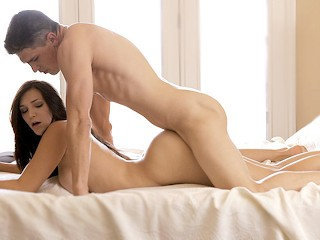

In [65]:
resp = urlopen(mostViewed['thumbnail'].values[0]).read()
Image.open(io.BytesIO(resp))

Top 5 most liked porn

In [ ]:
dataset[dataset['likes'] == dataset['likes'].max()]

The most disliked porn

In [115]:
dataset[dataset['likes'] == dataset['likes'].max()]

,embed,thumbnail,thumbnail2,title,tags,categories,pornstars,duration,views,likes,dislikes,thumbnail3,thumbnail4
4801,"<iframe src=""https://www.pornhub.com/embed/164...",https://di.phncdn.com/videos/201402/27/2379386...,https://di.phncdn.com/videos/201402/27/2379386...,fucking hot,busty;big-boobs;ass;tight;body;pornstar;pussy-...,Big Ass;Babe;Big Dick;Big Tits;Pornstar;Popula...,Bruce Venture;Holly Michaels,1324,139135270,460880.0,165818.0,https://di.phncdn.com/videos/201402/27/2379386...,https://di.phncdn.com/videos/201402/27/2379386...


Linear Relationship between each variable

In [ ]:
sns.heatmap(dataset[['views', 'duration', 'likes', 'dislikes']].corr(), annot=True);

Number of pornstars in the dataset

In [14]:
numVideoShotByPornstar = processedDataset.explode('pornstars')['pornstars']
numPornstars = len(numVideoShotByPornstar.unique())
f"There are {numPornstars} number of pornstars in the dataset"

'There are 6246 number of pornstars in the dataset'

Top 10 pornstars who shot the most porn

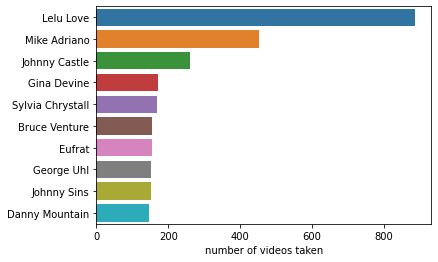

In [27]:
nVideoByPornstar = pd.DataFrame(numVideoShotByPornstar.value_counts()).head(10)
nVideoByPornstar.columns = ['number of videos taken']
sns.barplot(x=nVideoByPornstar['number of videos taken'], y=nVideoByPornstar.index);

Top 10 pornstars who shot the least porn

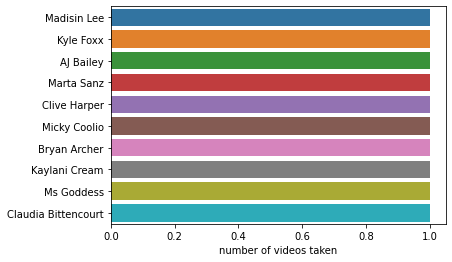

In [28]:
nVideoByPornstar = pd.DataFrame(numVideoShotByPornstar.value_counts()).tail(10)
nVideoByPornstar.columns = ['number of videos taken']
sns.barplot(x=nVideoByPornstar['number of videos taken'], y=nVideoByPornstar.index);

Top 10 Cumulative Porn Views By Pornstar (Top 10 Total Porn Views By Pornstar)

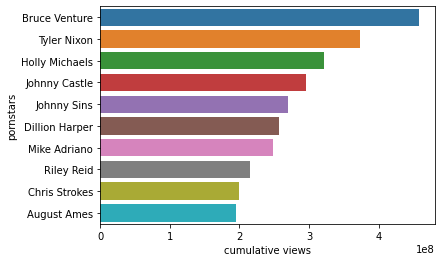

In [109]:
pornstarByVideoViews = processedDataset.explode('pornstars').groupby('pornstars')['views'].sum()
top10PornstarByVideoViews = pd.DataFrame(pornstarByVideoViews).sort_values(by='views', ascending=False).head(10)
top10PornstarByVideoViews.columns = ['cumulative views']
sns.barplot(x=top10PornstarByVideoViews['cumulative views'], y=top10PornstarByVideoViews.index);

Top 10 Lowest Cumulative Porn Views By Pornstar (Least 10 Total Porn Views By Pornstar)

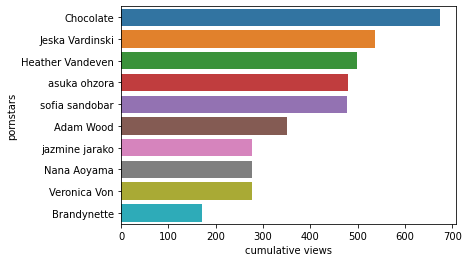

In [99]:
least10PornstarByVideoViews = pd.DataFrame(pornstarByVideoViews).sort_values(by='views', ascending=False).tail(10)
least10PornstarByVideoViews.columns = ['cumulative views']
sns.barplot(x=least10PornstarByVideoViews['cumulative views'], y=least10PornstarByVideoViews.index);

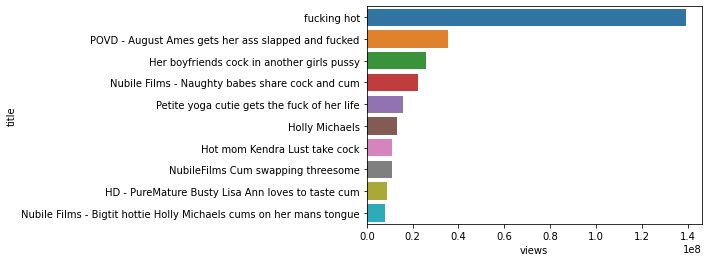

In [166]:
mostPopularPornstar = top10PornstarByVideoViews.index[0]
filterPornstar = processedDataset.apply(lambda x: True if mostPopularPornstar in x['pornstars'] else False, axis=1)
filterPornstar = processedDataset[filterPornstar]
sortedFilterPornstar = filterPornstar.sort_values(by='views', ascending=False).head(10)
sns.barplot(x=sortedFilterPornstar['views'], y=sortedFilterPornstar['title']);

Average Porn Views of Top 10 Popular Pornstar

In [180]:
def matchMoreThanOnePornstar(firstList, secondList):
    for pornstar in firstList:
        if pornstar in secondList:
            return True
    return False

In [196]:
top10PopularPornstar = top10PornstarByVideoViews.index
explodedDataset = processedDataset.explode('pornstars')
filterTop10PopularPornstar = explodedDataset.apply(lambda x: 
                                                        True if matchMoreThanOnePornstar(top10PopularPornstar, x['pornstars']) else False, axis=1)
filterTop10PopularPornstar = explodedDataset[filterTop10PopularPornstar].groupby('pornstars')['views'].mean()
filterTop10PopularPornstar.columns = ['mean views']
meanViewsOfTop10PopularPornstar = filterTop10PopularPornstar.sort_values(ascending=False).head(10)
sns.barplot(x=meanViewsOfTop10PopularPornstar['mean views'], y=meanViewsOfTop10PopularPornstar.index);

pornstars
August Ames       3.139840e+06
Bruce Venture     2.954673e+06
Chris Strokes     1.910728e+06
Dillion Harper    2.703108e+06
Holly Michaels    4.125739e+06
Johnny Castle     1.136190e+06
Johnny Sins       1.758939e+06
Mike Adriano      5.485437e+05
Riley Reid        2.368704e+06
Tyler Nixon       2.872559e+06
Name: views, dtype: float64

Number of Porn Tags In The Dataset

In [100]:
dropNoTagVideo = dataset.dropna(subset=['tags'])
splitTagsFromVideo=dropNoTagVideo['tags'].map(lambda x: x.split(';'))
PopularPornTagUploads = splitTagsFromVideo.explode('tags')
numPornTags = len(PopularPornTagUploads.unique())
f"number of Porn tags are {numPornTags}"

'number of Porn tags are 42134'

Top 10 Popular Porn Tag Uploads

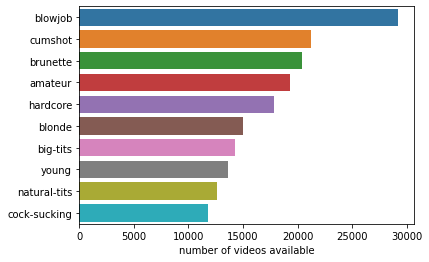

In [104]:
nTopVideoUploadsByTags = pd.DataFrame(PopularPornTagUploads.value_counts()).head(10)
nTopVideoUploadsByTags.columns = ['number of videos available']
sns.barplot(x=nTopVideoUploadsByTags['number of videos available'], y=nTopVideoUploadsByTags.index);

Least 10 Porn Tag Uploads

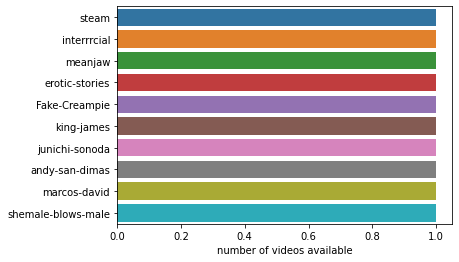

In [105]:
nLowestVideoUploadsByTags = pd.DataFrame(PopularPornTagUploads.value_counts()).tail(10)
nLowestVideoUploadsByTags.columns = ['number of videos available']
sns.barplot(x=nLowestVideoUploadsByTags['number of videos available'], y=nLowestVideoUploadsByTags.index);

Top 10 Cumulative Porn Views By Tags (Top 10 Total Porn Views By Tags)

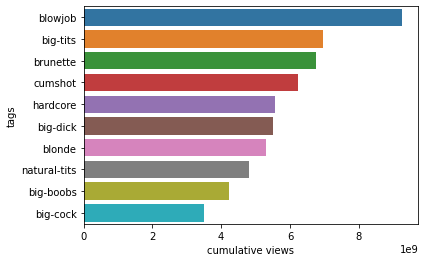

In [106]:
tagsByTopVideoCumulativeViews = processedDataset.explode('tags').groupby('tags')['views'].sum()
top10tagsByCumulativeVideoViews = pd.DataFrame(tagsByTopVideoCumulativeViews).sort_values(by='views', ascending=False).head(10)
top10tagsByCumulativeVideoViews.columns = ['cumulative views']
sns.barplot(x=top10tagsByCumulativeVideoViews['cumulative views'], y=top10tagsByCumulativeVideoViews.index);

10 Lowest Cumulative Porn Views By Tags (Least 10 Total Porn Views By Tags)

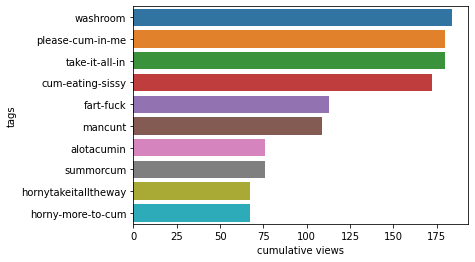

In [108]:
least10tagsByCumulativeVideoViews = pd.DataFrame(tagsByTopVideoCumulativeViews).sort_values(by='views', ascending=False).tail(10)
least10tagsByCumulativeVideoViews.columns = ['cumulative views']
sns.barplot(x=least10tagsByCumulativeVideoViews['cumulative views'], y=least10tagsByCumulativeVideoViews.index);